In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


In [110]:
# Function converts rgb images to grayscale images
def rgb_to_gray(rgb_image):
    ''' converts rgb images to grayscale images 
    Input: numpy array with pixel values for the rgb image
    Return: numpy array with pixel values for the grey scale image'''
    gray_image = rgb_image.copy()
    # Going through every index of the array, then calculating the average of blue , green and red color. 
    for i in range(len(rgb_image)):
        for j in range(len(rgb_image)):
            red = rgb_image[i, j, 0]
            blue = rgb_image[i, j, 1]
            green = rgb_image[i, j, 2]
            # Calculating the average of blue , green and red color allows us to combine the three colors into one number.
            # Average determines how bright the pixel is.
            grayscale_value = (blue + green + red) / 3
            # replacing rgb values by gray-scale values
            gray_image[i, j] = grayscale_value
    return gray_image

C:\Users\yusuf\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


array([[17, 17, 17, ..., 74, 74, 74],
       [75, 75, 75, ..., 73, 73, 73],
       [55, 55, 55, ..., 46, 46, 46],
       ...,
       [74, 74, 74, ..., 67, 67, 67],
       [77, 77, 77, ..., 25, 25, 25],
       [25, 25, 25, ..., 51, 51, 51]], dtype=uint8)

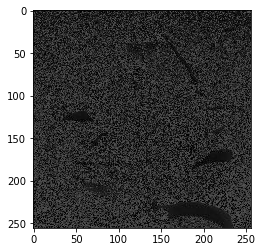

In [95]:
directory1 ='C:\\Users\\yusuf\\Downloads\\Tomato_Knn\\Tomato___healthy\\'
# empty list for all colored images
Tomato_healty_g = []

# iterate over the files in the directory
for filename in os.listdir(directory1):
    # pathname
    url1 = os.path.join(directory1, filename)
    # get single picture from directory
    img_rgb1 = plt.imread(url1)
    # convert the picture into grayscale
    img_gray2 = rgb2gray(img_rgb1)
    # add image to list of gray images
    Tomato_healty_g.append(img_gray2)


# convert list into numpy-array
Tomato_healty_g = np.array(Tomato_healty_g)
# each image contains 256 x 256 pixels with 3 channels, 256 x 256 x 3 = 196608
Tomato_healty_g = Tomato_healty_g.reshape(Tomato_healty_g.shape[0], 196608)
Tomato_healty_g

C:\Users\yusuf\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


array([[17, 17, 17, ..., 74, 74, 74],
       [75, 75, 75, ..., 73, 73, 73],
       [55, 55, 55, ..., 46, 46, 46],
       ...,
       [74, 74, 74, ..., 67, 67, 67],
       [77, 77, 77, ..., 25, 25, 25],
       [25, 25, 25, ..., 51, 51, 51]], dtype=uint8)

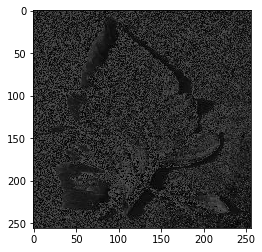

In [112]:
directory2 ='C:\\Users\\yusuf\\Downloads\\Tomato_Knn\\Tomato___Late_blight\\'
# empty list for all colored images
Tomato_unhealty_g = []

# iterate over the files in the directory
for filename in os.listdir(directory2):
    # pathname
    url2 = os.path.join(directory2, filename)
    # get single picture from directory
    img_rgb2 = plt.imread(url2)
    # convert the picture into grayscale
    img_gray3 = rgb_to_gray(img_rgb2)
    # add image to list of gray images
    Tomato_unhealty_g.append(img_gray2)


# convert list into numpy-array
Tomato_unhealty_g = np.array(Tomato_unhealty_g)
# each image contains 256 x 256 pixels with 3 channels, 256 x 256 x 3 = 196608
Tomato_unhealty_g = Tomato_healty_g.reshape(Tomato_healty_g.shape[0], 196608)
Tomato_unhealty_g

In [138]:
# Two datasets merged into one dataset
# Total length of dataset is 1000. 90% for trainging and 10% for testing.
X_train_healty = Tomato_healty_g[0:450]
X_train_unhealty = Tomato_unhealty_g[0:450]
X_train = np.append (X_train_healty, X_train_healty, axis=0)
len(X_train)

900

In [146]:
# Two datasets merged into one dataset
X_test_healty = Tomato_healty_g[450:500]
X_test_unhealty = Tomato_unhealty_g[450:500]
X_test = np.append (X_test_healty, X_test_healty, axis=0)
len(X_test)

100

In [140]:
# I made an array. 0 mean is healty tomato leaf. 1 mean is unhealth tomato leaf.
y_train_healty = np.full(
  shape=450,
  fill_value=0,
  dtype=np.int)

y_train_unhealty = np.full(
  shape=450,
  fill_value=1,
  dtype=np.int)

y_train= np.append(y_train_healty,y_train_unhealty,axis=0)

In [143]:
len(y_train)

900

In [141]:
y_test_healty = np.full(
  shape=50,
  fill_value=0,
  dtype=np.int)

y_test_unhealty = np.full(
  shape=50,
  fill_value=1,
  dtype=np.int)

y_test= np.append(y_test_healty, y_test_unhealty,axis=0)

In [144]:
len(y_test)

100

In [147]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [148]:
clf = KNN(5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_train)
for i in prediction:
    print(i, end= ' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Can be seen all trainig data predicted as a healty leaf. Accuracy is 50%. 

In [149]:
# Accuracy
core= clf.score(X_test,y_test)
print(score)

0.5


In [161]:
k_values = [1,2,3,4,5]
test_scores = []
for k in k_values:
    clf = KNN(k)
    clf.fit(X_train, y_train)
    test_scores.append(clf.score(X_test,y_test))

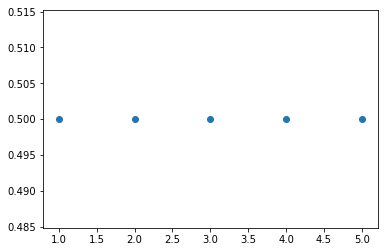

In [163]:
plt.scatter(k_values, test_scores)
plt.show()

There is no difference between accuracy scores.